<a href="https://colab.research.google.com/github/x0R3d/xrays_dataton/blob/main/xrays_dataton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline

# Анализ данных

In [ ]:
df = pd.read_csv('xrays_data.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143


In [ ]:
df.describe()

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,3827.000000,4715.000000,0.198800,0.198800


## Очистка данных:

In [ ]:
df = df[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)


## Анализ возраста пациентов:

In [ ]:
df['Age Type'] = df['Patient Age'].apply(lambda x: x[-1:])
df['Age Type'].unique()
# у нас в основном возраст выражается в годах, но также несколько выражены в месяцах или днях
print(df[df['Age Type']=='Y']['Patient ID'].count())
print(df[df['Age Type']=='M']['Patient ID'].count())  
print(df[df['Age Type']=='D']['Patient ID'].count())

112093
26
1


In [ ]:
# мы собираемся удалить символ после возраста пациентов и преобразовать D и M в годы
df['Age'] = df['Patient Age'].apply(lambda x: x[:-1]).astype(int)
df.loc[df['Age Type']=='M',['Age']] = df[df['Age Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)
df.loc[df['Age Type']=='D',['Age']] = df[df['Age Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)
print(df[df['Age Type']=='D']['Age'])
df[df['Age Type']=='M']['Age']

94960    0
Name: Age, dtype: int64


53031     1
69369     2
77180     2
77502     1
77503     1
77504     2
77505     2
79441     1
79442     2
79443     2
79444     2
81427     0
81789     2
83975     1
84489     2
85239     2
85399     0
87183     2
87726     2
95356     1
95791     2
97767     2
99300     2
100418    1
101328    2
103809    1
Name: Age, dtype: int64

У нас есть некоторые странные значения для возраста пациентов (16 старше 145 лет!):

In [ ]:
df['Age'].sort_values(ascending=False).head(20)

46965     414
86264     413
91369     412
20852     412
85404     412
84810     411
104590    155
101194    155
98495     154
95794     153
74884     152
78795     151
58650     150
62929     149
55742     148
48284     148
58464      95
578        94
74736      94
74735      94
Name: Age, dtype: int64

У нас также есть странные значения для «Follow-up #» по сравнению с «Patient Age». Таким образом, мы не можем считать, что «Follow-up #» расположены в хронологическом порядке:

In [ ]:
df.loc[df['Patient ID']==5567,['Patient Age','Finding Labels','Follow-up #']].sort_values('Follow-up #',ascending=True)
df.loc[df['Patient ID']==5567,['Patient Age','Finding Labels','Follow-up #']].sort_values('Patient Age',ascending=False)

,Patient Age,Finding Labels,Follow-up #
20852,412Y,Effusion|Pneumonia,0
20861,057Y,No Finding,9
20859,057Y,Fibrosis,7
20860,057Y,Fibrosis,8
20856,054Y,Atelectasis,4
20857,054Y,Atelectasis,5
20858,054Y,No Finding,6
20876,053Y,Atelectasis|Consolidation,24
20853,053Y,Effusion,1
20877,053Y,No Finding,25


**Все эти замечания означают, что при создании этого огромного набора данных могло быть допущено несколько ошибок. Мы должны помнить об этом для будущих расследований.**

## Отображение количества каждого заболевания по полу пациента

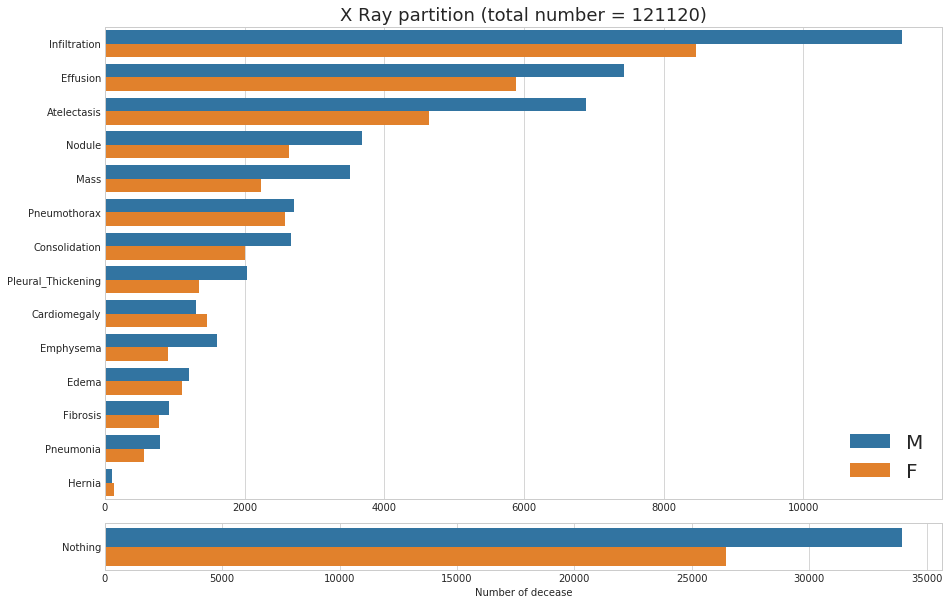

In [ ]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['Patient Gender'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='Patient Gender',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

## Теперь проверим распределение возраста по полу

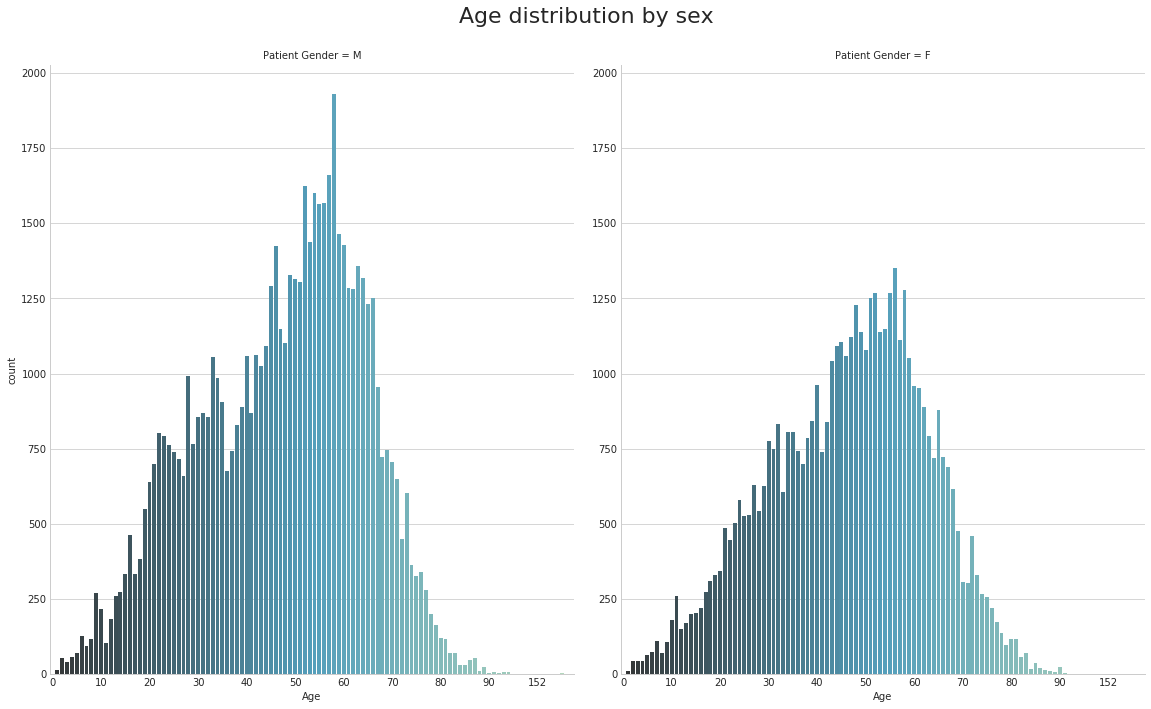

In [ ]:
g = sns.factorplot(x="Age", col="Patient Gender",data=df, kind="count",size=10, aspect=0.8,palette="GnBu_d");
g.set_xticklabels(np.arange(0,100));
g.set_xticklabels(step=10);
g.fig.suptitle('Age distribution by sex',fontsize=22);
g.fig.subplots_adjust(top=.9)

## Отображение распределения патологий по возрасту и полу

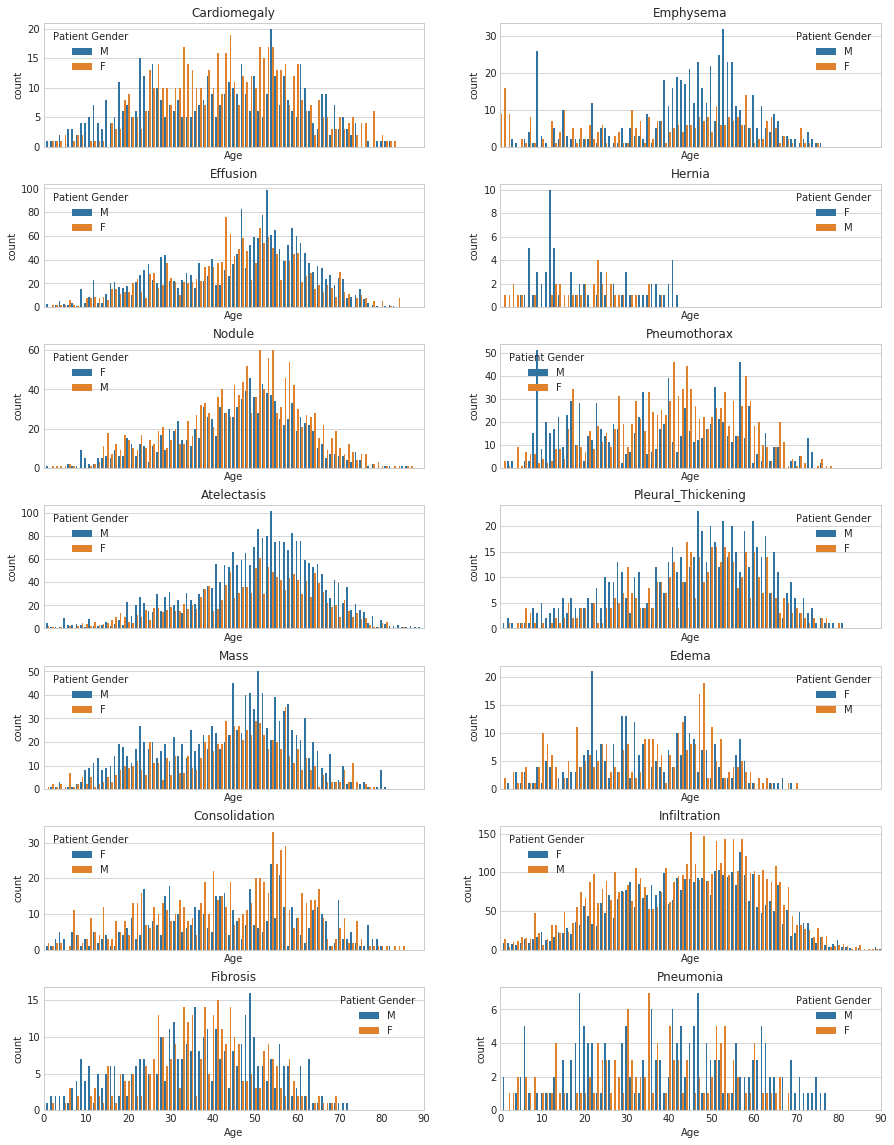

In [ ]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list :
    g=sns.countplot(x='Age', hue="Patient Gender",data=df[df['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)   
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)


## Отображение номера пациента по Follow-up

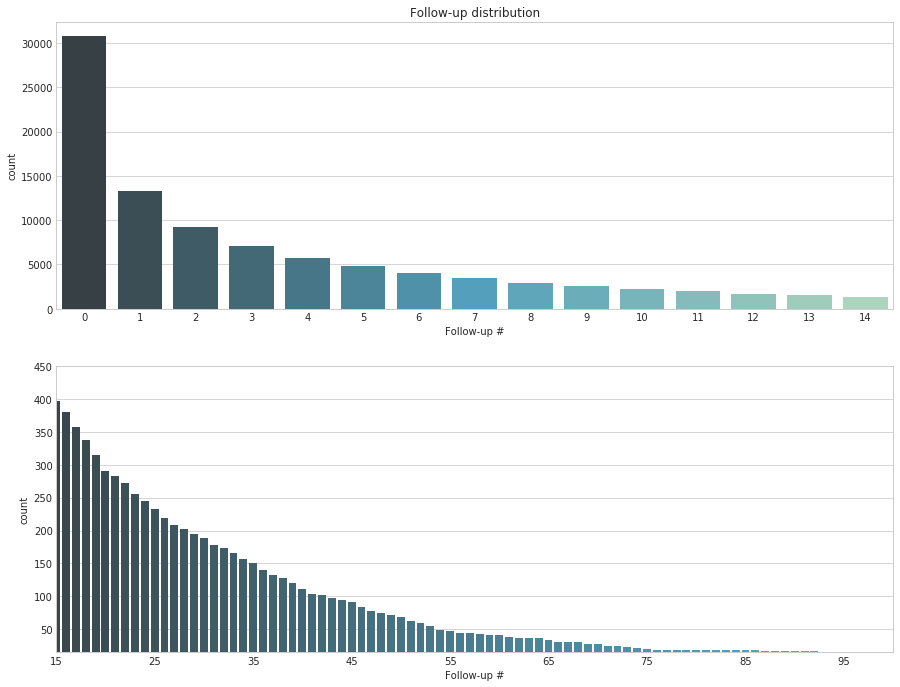

In [ ]:
f, (ax1,ax2) = plt.subplots( 2, figsize=(15, 10))

data = df[df['Follow-up #']<15]
g = sns.countplot(x='Follow-up #',data=data,palette="GnBu_d",ax=ax1);

ax1.set_title('Follow-up distribution');
data = df[df['Follow-up #']>14]
g = sns.countplot(x='Follow-up #',data=data,palette="GnBu_d",ax=ax2);
x=np.arange(15,100,10)
g.set_ylim(15,450)
g.set_xlim(15,100)
g.set_xticks(x)
g.set_xticklabels(x)
f.subplots_adjust(top=1)

## Попробуем найти связь между патологиями

In [ ]:
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False).head(23)
data=data[['|' in index for index in data.index.values]]
data

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Age Type,Age,Nothing
Finding Labels,,,,,,,,,,,,,,,,,,,,,
Effusion|Infiltration,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602,...,1602,1602,1602,1602,1602,1602,1602,1602,1602,1602
Atelectasis|Infiltration,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356,...,1356,1356,1356,1356,1356,1356,1356,1356,1356,1356
Atelectasis|Effusion,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,...,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167
Infiltration|Nodule,829,829,829,829,829,829,829,829,829,829,...,829,829,829,829,829,829,829,829,829,829
Atelectasis|Effusion|Infiltration,740,740,740,740,740,740,740,740,740,740,...,740,740,740,740,740,740,740,740,740,740
Cardiomegaly|Effusion,483,483,483,483,483,483,483,483,483,483,...,483,483,483,483,483,483,483,483,483,483
Consolidation|Infiltration,442,442,442,442,442,442,442,442,442,442,...,442,442,442,442,442,442,442,442,442,442
Infiltration|Mass,420,420,420,420,420,420,420,420,420,420,...,420,420,420,420,420,420,420,420,420,420
Effusion|Pneumothorax,405,405,405,405,405,405,405,405,405,405,...,405,405,405,405,405,405,405,405,405,405


Теперь нам нужно сравнить соотношение между простыми и множественными заболеваниями.

In [ ]:
data=df.groupby('Finding Labels').count().sort_values('Patient ID',ascending=False)
df1=data[['|' in index for index in data.index]].copy()
df2=data[['|' not in index for index in data.index]]
df2=df2[['No Finding' not in index for index in df2.index]]
df2['Finding Labels']=df2.index.values
df1['Finding Labels']=df1.index.values


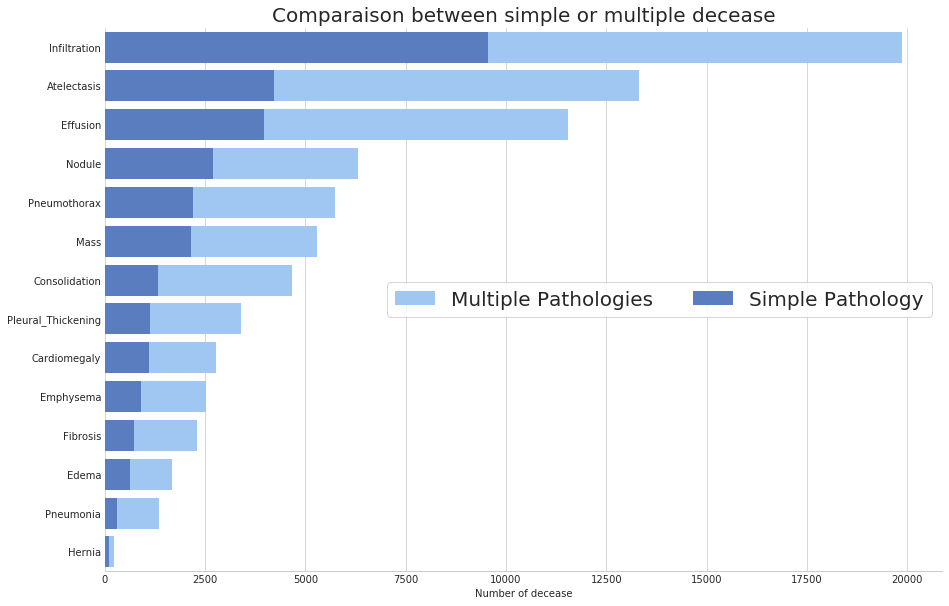

In [ ]:
f, ax = plt.subplots(sharex=True,figsize=(15, 10))
sns.set_color_codes("pastel")
g=sns.countplot(y='Category',data=data1, ax=ax, order = data1['Category'].value_counts().index,color='b',label="Multiple Pathologies")
sns.set_color_codes("muted")
g=sns.barplot(x='Patient ID',y='Finding Labels',data=df2, ax=ax, color="b",label="Simple Pathology")
ax.legend(ncol=2, loc="center right", frameon=True,fontsize=20)
ax.set( ylabel="",xlabel="Number of decease")
ax.set_title("Comparaison between simple or multiple decease",fontsize=20)      
sns.despine(left=True)

Отобразим наиболее важные группы патологий для каждого заболевания

In [ ]:
df3=df1.loc[df1['Patient ID']>30,['Patient ID','Finding Labels']]

for pathology in pathology_list:
    df3[pathology]=df3.apply(lambda x: x['Patient ID'] if pathology in x['Finding Labels'] else 0, axis=1)

df3.head(20)

,Patient ID,Finding Labels,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
Finding Labels,,,,,,,,,,,,,,,,
Effusion|Infiltration,1602,Effusion|Infiltration,0,0,1602,0,0,0,0,0,0,0,0,1602,0,0
Atelectasis|Infiltration,1356,Atelectasis|Infiltration,0,0,0,0,0,0,1356,0,0,0,0,1356,0,0
Atelectasis|Effusion,1167,Atelectasis|Effusion,0,0,1167,0,0,0,1167,0,0,0,0,0,0,0
Infiltration|Nodule,829,Infiltration|Nodule,0,0,0,0,829,0,0,0,0,0,0,829,0,0
Atelectasis|Effusion|Infiltration,740,Atelectasis|Effusion|Infiltration,0,0,740,0,0,0,740,0,0,0,0,740,0,0
Cardiomegaly|Effusion,483,Cardiomegaly|Effusion,483,0,483,0,0,0,0,0,0,0,0,0,0,0
Consolidation|Infiltration,442,Consolidation|Infiltration,0,0,0,0,0,0,0,0,0,0,442,442,0,0
Infiltration|Mass,420,Infiltration|Mass,0,0,0,0,0,0,0,0,420,0,0,420,0,0
Effusion|Pneumothorax,405,Effusion|Pneumothorax,0,0,405,0,0,405,0,0,0,0,0,0,0,0


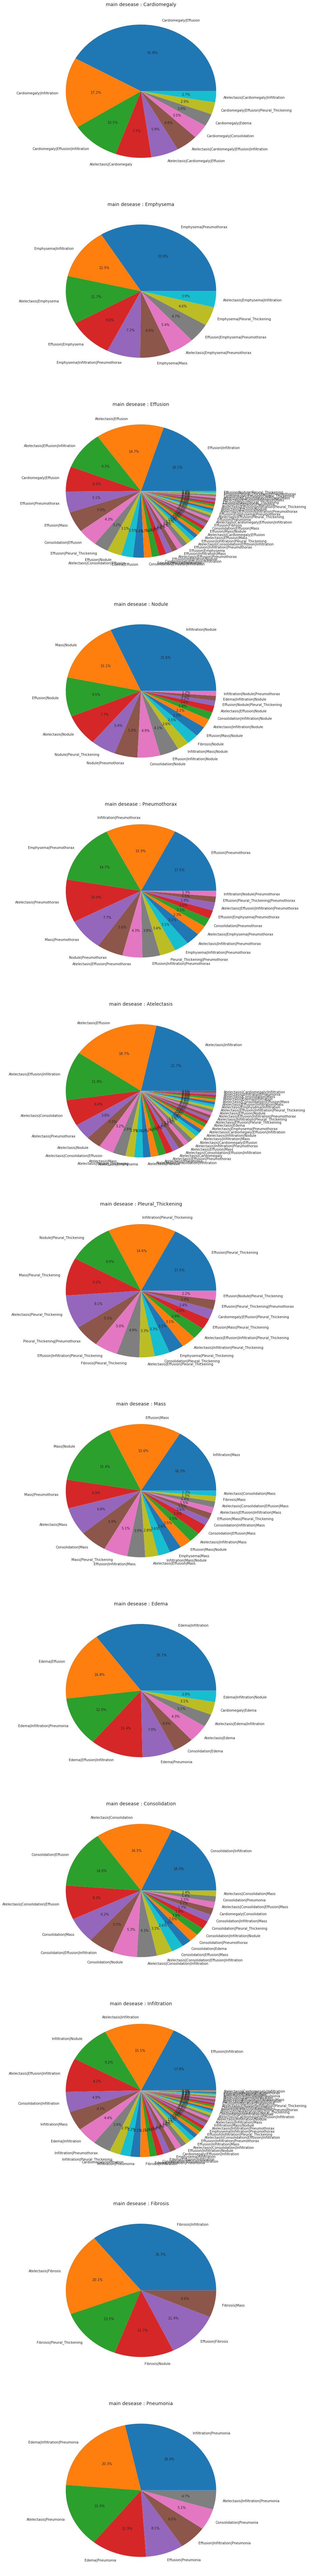

In [ ]:
df4=df3[df3['Hernia']>0]
pat_list=[elem for elem in pathology_list if 'Hernia' not in elem]

f, axarr = plt.subplots(13, sharex=True,figsize=(10, 140))
i=0
for pathology in pat_list :
    df4=df3[df3[pathology]>0]
    if df4.size>0:
        axarr[i].pie(df4[pathology],labels=df4['Finding Labels'], autopct='%1.1f%%')
        axarr[i].set_title('main desease : '+pathology,fontsize=14)   
        i +=1